In [ ]:
BankNote_Authentication

Import the required libraries

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import  shuffle
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


define the one hot encode function

In [2]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

Read Dataset

In [5]:
df = pd.read_csv("BankNote_Authentication.csv")
print(len(df.columns))
X = df[df.columns[0:4]].values
y=df[df.columns[4]]

5


Encode the dependent variable containing categorical values

In [6]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
Y = one_hot_encode(y)

Transform the data in training and testing


In [7]:
X,Y = shuffle(X,Y,random_state=1)
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.20, random_state=42)

Define and initialize the variables to work with the tensors


In [17]:
learning_rate = 0.3
training_epochs = 100

Array to store cost obtained in each epoch


In [18]:
cost_history = np.empty(shape=[1],dtype=float)
 
n_dim = X.shape[1]
n_class = 2
 
x = tf.placeholder(tf.float32,[None, n_dim])
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))

Initialize all variables.


In [19]:
init = tf.global_variables_initializer()

 
Define the cost function


In [20]:
y_ = tf.placeholder(tf.float32,[None,n_class])
y = tf.nn.softmax(tf.matmul(x, W)+ b)
cost_function = tf.reduce_mean(-tf.reduce_sum((y_ * tf.log(y)),reduction_indices=[1]))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

Initialize the session


In [21]:
sess = tf.Session()
sess.run(init)
mse_history = []

Calculate the cost for each epoch


In [22]:
for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    cost = sess.run(cost_function,feed_dict={x: train_x,y_: train_y})
    cost_history = np.append(cost_history,cost)
    print('epoch : ', epoch,  ' - ', 'cost: ', cost)
 
pred_y = sess.run(y, feed_dict={x: test_x})

epoch :  0  -  cost:  0.7978837
epoch :  1  -  cost:  0.22671172
epoch :  2  -  cost:  0.23990792
epoch :  3  -  cost:  0.15014303
epoch :  4  -  cost:  0.14130199
epoch :  5  -  cost:  0.13066609
epoch :  6  -  cost:  0.12510158
epoch :  7  -  cost:  0.12035792
epoch :  8  -  cost:  0.1163529
epoch :  9  -  cost:  0.112760834
epoch :  10  -  cost:  0.10948915
epoch :  11  -  cost:  0.10648043
epoch :  12  -  cost:  0.103698075
epoch :  13  -  cost:  0.10111406
epoch :  14  -  cost:  0.098705485
epoch :  15  -  cost:  0.09645323
epoch :  16  -  cost:  0.094341084
epoch :  17  -  cost:  0.09235519
epoch :  18  -  cost:  0.09048355
epoch :  19  -  cost:  0.0887158
epoch :  20  -  cost:  0.087042846
epoch :  21  -  cost:  0.08545672
epoch :  22  -  cost:  0.08395037
epoch :  23  -  cost:  0.08251754
epoch :  24  -  cost:  0.08115267
epoch :  25  -  cost:  0.07985076
epoch :  26  -  cost:  0.078607336
epoch :  27  -  cost:  0.07741834
epoch :  28  -  cost:  0.07628011
epoch :  29  -  cost:

#Calculate Accuracy


Accuracy: 0.9890909


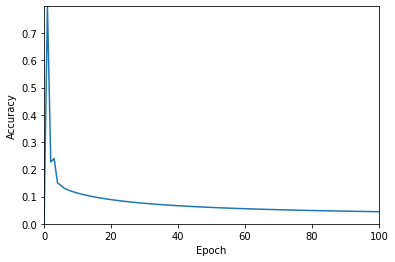

In [25]:
correct_prediction = tf.equal(tf.argmax(pred_y,1), tf.argmax(test_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print("Accuracy:",sess.run(accuracy))
 
plt.plot(range(len(cost_history)),cost_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()